In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [4]:
theta = np.random.randn(2, 1)

In [6]:
X_b = np.c_[np.ones((100, 1)), X]

In [8]:
learning_rate = 0.1
n_iterations = 100
momentum = 0.9
nesterov = True

loss_history = []
velocity = np.zeros_like(theta)

for iteration in range(n_iterations):
    if nesterov:
        theta_lookahead = theta - momentum * velocity
        gradients = 2/100 * X_b.T.dot(X_b.dot(theta_lookahead) - y)
    else:
        gradients = 2/100 * X_b.T.dot(X_b.dot(theta) - y)
    
    velocity = momentum * velocity + learning_rate * gradients
    theta = theta - velocity

    loss = np.mean((X_b.dot(theta) - y) ** 2)
    loss_history.append(loss)

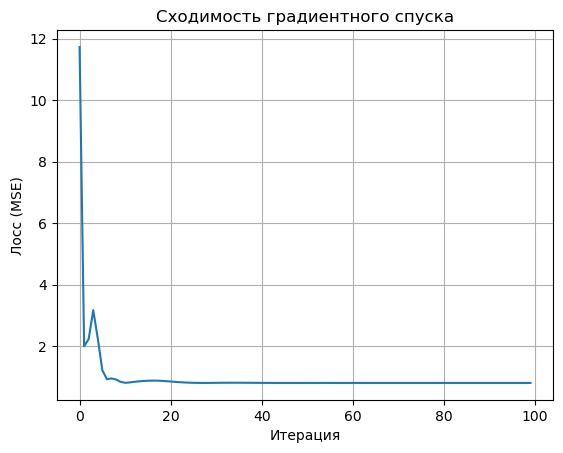

In [12]:
plt.plot(loss_history)
plt.xlabel('Итерация')
plt.ylabel('Лосс (MSE)')
plt.title('Сходимость градиентного спуска')
plt.grid()
plt.show()

In [14]:
print(f"Финальные параметры: {theta.ravel()}")

Финальные параметры: [4.21475626 2.7704135 ]


Градиентный спуск успешно сошёлся: кривая лосса резко убывает на первых итерациях и быстро стабилизируется. Это говорит о правильной настройке скорости обучения и использовании моментума для ускорения сходимости. Осцилляции на старте минимальны, что подтверждает хорошее подавление колебаний. Финальные параметры модели [4.21, 2.77] близки к истинным значениям коэффициентов в задаче регрессии.
Эксперимент показал эффективность метода Nesterov Momentum в ускорении сходимости и стабилизации обучения.

